In [1]:
import numpy as np
import scipy as sc

from sklearn.linear_model import LogisticRegression, LinearRegression

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('seaborn-notebook')

# Use just "%matplotlib" if you want the graphs to be displayed in a new window
#%matplotlib 
%matplotlib inline


In [2]:
# LARGE DOGS AND SMALL HORSES - SET DISTRIBUTION PARAMETERS
# MAY OR MAY NOT CORRESPOND TO ACTUAL EARTH MAMMAL DIMENSIONS

number_of_observations = 100 # per class
dog_weight_mean = 80
dog_weight_stddev = 10
dog_height_mean = 20
dog_height_stddev = 10
horse_weight_mean = 100
horse_weight_stddev = 10
horse_height_mean = 42
horse_height_stddev = 10

In [3]:
# GENERATE SAMPLE OBSERVATIONS
np.random.seed(42)
dog_weights = np.random.normal(dog_weight_mean,
                               dog_weight_stddev,
                               number_of_observations)
dog_heights = np.random.normal(dog_height_mean,
                               dog_height_stddev,
                               number_of_observations)
dog_targets = [0]*number_of_observations
horse_weights = np.random.normal(horse_weight_mean,
                                 horse_weight_stddev,
                                 number_of_observations).clip(80)
horse_heights = np.random.normal(horse_height_mean,
                                 horse_height_stddev,
                                 number_of_observations)
horse_targets = [1]*number_of_observations

weights = np.hstack((dog_weights, horse_weights))
heights = np.hstack((dog_heights, horse_heights))

X = np.vstack((weights, heights)).T.clip(min=1)
y = np.hstack((dog_targets,horse_targets))

X_horses = X[y == 1]
y_horses = y[y == 1]

X_dogs = X[y == 0]
y_dogs = y[y == 0]


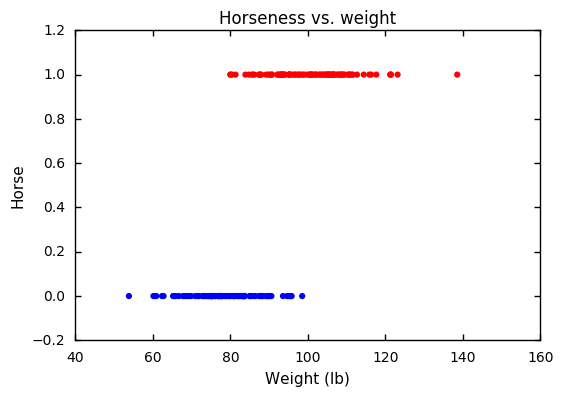

In [4]:
plt.scatter(X[:,0], y, c=y, cmap='bwr', edgecolor='')
plt.xlabel('Weight (lb)')
plt.ylabel('Horse')
plt.title('Horseness vs. weight')
plt.show()

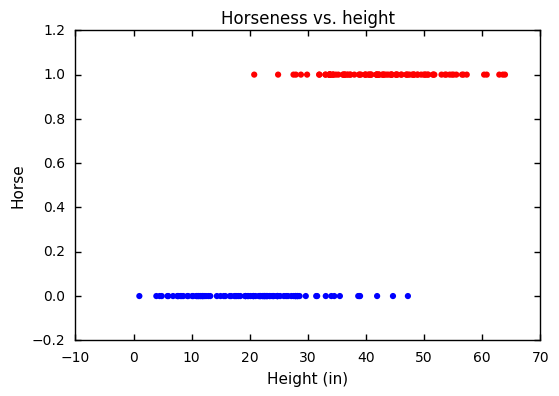

In [5]:
plt.scatter(X[:,1], y, c=y, cmap='bwr', edgecolor='')
plt.xlabel('Height (in)')
plt.ylabel('Horse')
plt.title('Horseness vs. height')
plt.show()

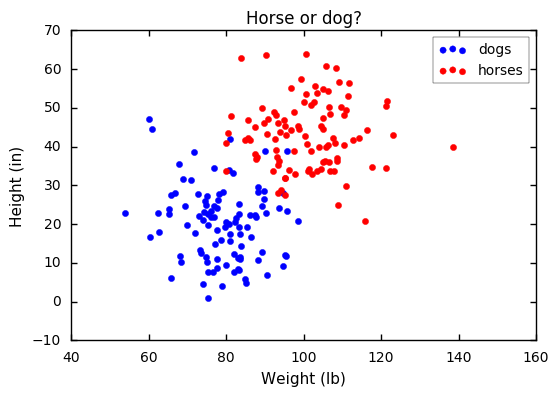

In [6]:
plt.scatter(X_dogs[:,0], X_dogs[:,1], color='b', label='dogs')
plt.scatter(X_horses[:,0], X_horses[:,1], color='r', label='horses')
plt.legend()
plt.xlabel('Weight (lb)')
plt.ylabel('Height (in)')
plt.title('Horse or dog?')
plt.show()


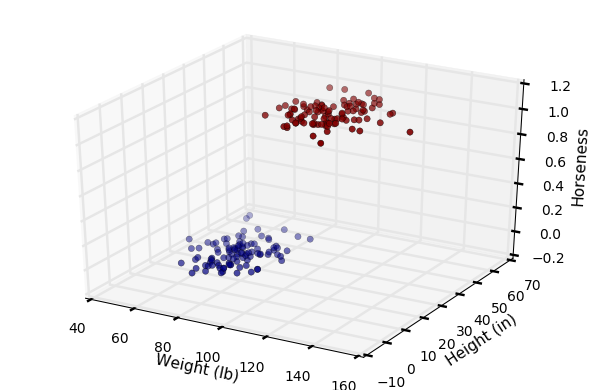

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c=y)
ax.set_xlabel('Weight (lb)')
ax.set_ylabel('Height (in)')
ax.set_zlabel('Horseness')
plt.tight_layout()
plt.show()


In [8]:
log_model = LogisticRegression()
log_model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
x_ = np.linspace(40, 160, 100)

In [10]:
log_model.coef_[0]

array([ 0.00946155,  0.14221671])

In [11]:
discriminator_line = -(log_model.intercept_ + log_model.coef_[0][0]*x_)/log_model.coef_[0][1]

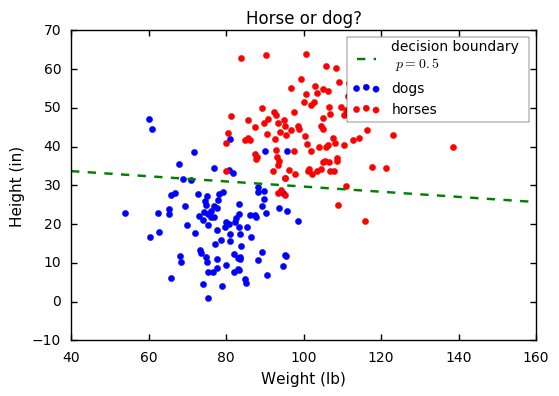

In [33]:
plt.scatter(X_dogs[:,0], X_dogs[:,1], color='b', label='dogs')
plt.scatter(X_horses[:,0], X_horses[:,1], color='r', label='horses')
plt.plot(x_, discriminator_line, 'g--', label = "decision boundary \n $p=0.5$")
plt.xlim([40,160])
plt.ylim([-10,70])
plt.legend()
plt.xlabel('Weight (lb)')
plt.ylabel('Height (in)')
plt.title('Horse or dog?')
plt.show()


In [13]:
xx, yy = np.meshgrid(np.linspace(40,160,100), np.linspace(0,70,100))

In [14]:
xy = np.c_[xx.ravel(), yy.ravel()]

In [15]:
z = log_model.predict_proba(xy)[:,1].reshape(xx.shape)

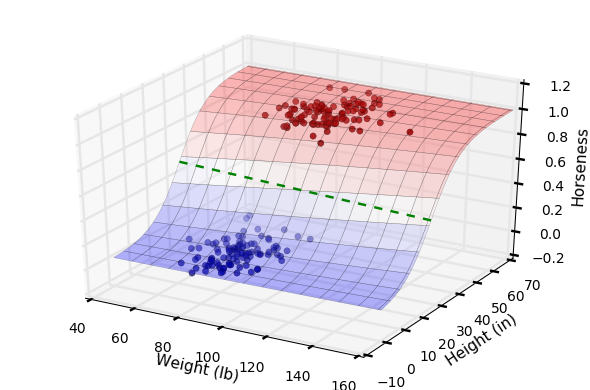

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c=y)
ax.plot_surface(xx, yy, z, cmap='bwr', alpha=0.3, rstride=7, cstride=7)
ax.plot(x_, discriminator_line, zs=0.5, linestyle='--', color='g')
ax.set_xlim([40,160])
ax.set_ylim([-10, 70])
ax.set_xlabel('Weight (lb)')
ax.set_ylabel('Height (in)')
ax.set_zlabel('Horseness')
plt.tight_layout()
plt.show()


In [17]:
lin_model_w = LinearRegression()
lin_model_w.fit(X[:,:1],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
x_ = np.linspace(40,160,100)
line_ = lin_model_w.coef_*x_ + lin_model_w.intercept_

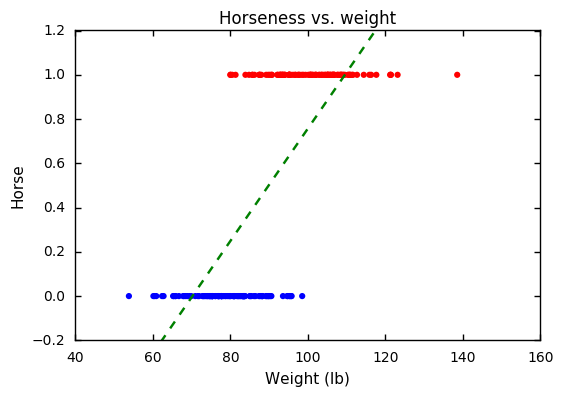

In [19]:
plt.scatter(X[:,0], y, c=y, cmap='bwr', edgecolor='')
plt.plot(x_, line_, 'g--')
plt.xlim([40,160])
plt.ylim([-0.2,1.201])
plt.xlabel('Weight (lb)')
plt.ylabel('Horse')
plt.title('Horseness vs. weight')
plt.show()

In [20]:
log_model_w = LogisticRegression()
log_model_w.fit(X[:,:1],y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
x_ = np.linspace(40,160,100).reshape(-1,1)
sigmoid = log_model_w.predict_proba(x_)[:,1]

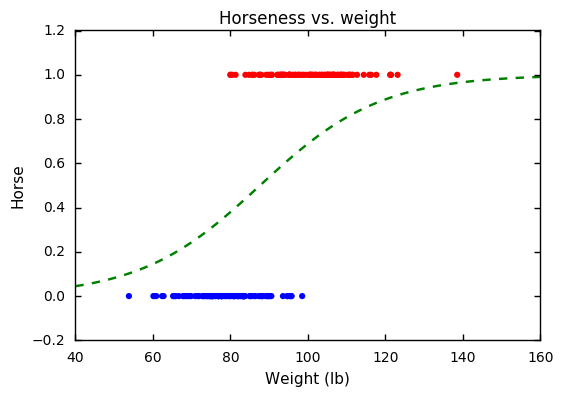

In [22]:
plt.scatter(X[:,0], y, c=y, cmap='bwr', edgecolor='')
plt.plot(x_, sigmoid, 'g--')
plt.xlim([40,160])
plt.ylim([-0.2,1.201])
plt.xlabel('Weight (lb)')
plt.ylabel('Horse')
plt.title('Horseness vs. weight')
plt.show()

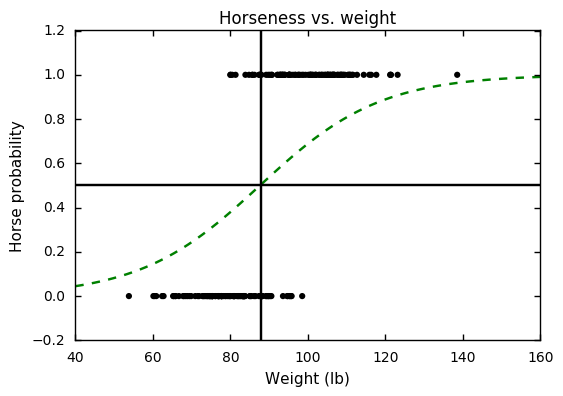

In [23]:
plt.scatter(X[:,0], y, color='k', edgecolor='')
plt.plot(x_, sigmoid, 'g--')
plt.axhline(0.5, color='k')
plt.axvline(88, color='k')

plt.xlim([40,160])
plt.ylim([-0.2,1.201])
plt.xlabel('Weight (lb)')
plt.ylabel('Horse probability')
plt.title('Horseness vs. weight')
plt.show()

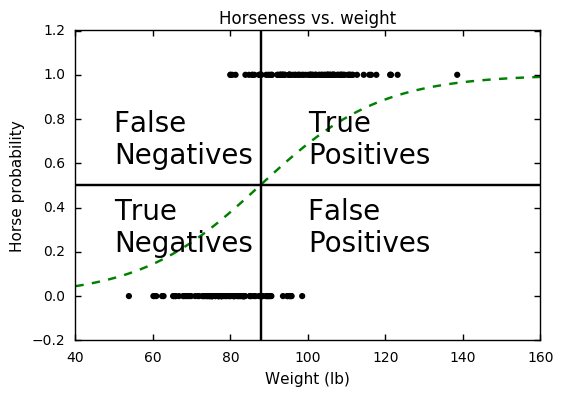

In [32]:
plt.scatter(X[:,0], y, color='k', edgecolor='')
plt.plot(x_, sigmoid, 'g--')
plt.axhline(0.5, color='k')
plt.axvline(88, color='k')

plt.text(50, 0.6, 'False \nNegatives', size=20)
plt.text(50, 0.2, 'True \nNegatives', size=20)
plt.text(100, 0.6, 'True \nPositives', size=20)
plt.text(100, 0.2, 'False \nPositives', size=20)


plt.xlim([40,160])
plt.ylim([-0.2,1.201])
plt.xlabel('Weight (lb)')
plt.ylabel('Horse probability')
plt.title('Horseness vs. weight')
plt.show()